# Naive Bayes-Logistic Regression

<img class=" lazyloaded" data-src="https://bloopglobal.com/wp-content/uploads/2020/11/interactive-presentation-header-1.gif" alt="" title="interactive-presentation-header" src="https://bloopglobal.com/wp-content/uploads/2020/11/interactive-presentation-header-1.gif">

In this project certain classification algorithms will be applied to the given dataset in order to evaluate their performances on different conditions.

In [ ]:
 from google.colab import drive
drive.mount("gdrive")

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


## Importing Necessary Libraries and Frameworks

This procedure is done in only one cell for the sake of simplicity and better representation. Sklearn will used in order to train and test different machine learning algorithms on the provided dataset. Pandas will be used in order to obtain observable dataframes and matplotlib.pyplot will be used for plotting operations regarding on the dataset.

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.metrics import auc,classification_report,RocCurveDisplay,f1_score,accuracy_score,plot_confusion_matrix,confusion_matrix
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import make_pipeline

import gensim.downloader
import nltk
import string 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install -q --upgrade ipython
!pip install -q --upgrade ipykernel

## Importing dataset

In [ ]:
PATH = "/content/gdrive/MyDrive/CS-445"

In [ ]:
train_df = pd.read_csv(PATH+"/train.csv",index_col=0)
train_df.head(-1)

,id,text,label
0,547530,Beşiktaş'ın eski teknik direktörü Slaven Bilic...,spor
1,42683,"14 Şubat, Katolik Kilisesi’nin azizlerinden St...",yazarlar
2,770925,İstanbul Kağıthane’de gece yarısı sokakta oyun...,video
3,473224,Ziraat Türkiye Kupası maçında deplasmanda Amed...,video
4,44833,"Eski Brezilyalı yıldız oyuncu Ronaldo, Brezily...",spor
...,...,...,...
7994,812733,Çanakkale’den “Herkes İçin Adalet” diye seslen...,yazarlar
7995,786591,"Eskişehirspor Yönetimi, teknik direktörlük gör...",spor
7996,144257,"UEFA Disiplin Kurulu, Borussia Dortmund-Galata...",spor
7997,675701,Rusya Federasyon Konseyi Uluslararası İlişkile...,dunya


In [ ]:
test_df = pd.read_csv(PATH+"/test.csv",index_col=0)
test_df.head(-1)

,id,text,label
0,416549,"""Filmimde oynadı ama 32 yıldır görmüyordum abi...",video
1,462801,"Katalonya'nın yeni Başkanı Carles Puigdemont, ...",dunya
2,114173,İstanbul Avcılar'da E-5 üzerinde bir yakıt tan...,video
3,458380,CNN Türk muhabiri emniyet kemeri haberi yapmak...,video
4,287566,\n\n\n \nCumhurbaşkanı Gül yasama yılını açark...,yazarlar
...,...,...,...
1994,51087,"Almanya'nın Köln kentinde, Köln Türkiye Gençli...",video
1995,318095,Turkish Airlines Euroleague'deki temsilcilerim...,spor
1996,283607,Akıl Oyunları filmine ilham veren ünlü matemat...,dunya
1997,244760,Eski ÖSYM Başkanı Ali Demir KPSS soruşturması ...,turkiye


## Metadata about the dataset

###Train Data

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      8000 non-null   int64 
 1   text    8000 non-null   object
 2   label   8000 non-null   object
dtypes: int64(1), object(2)
memory usage: 250.0+ KB


In [ ]:
train_df.label.value_counts()

turkiye     1630
dunya       1606
yazarlar    1599
spor        1583
video       1582
Name: label, dtype: int64

In [ ]:
train_df.isnull().sum(axis = 0)

id       0
text     0
label    0
dtype: int64

###Test Data

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   text    2000 non-null   object
 2   label   2000 non-null   object
dtypes: int64(1), object(2)
memory usage: 62.5+ KB


In [ ]:
test_df.label.value_counts()

turkiye     421
video       408
dunya       395
yazarlar    392
spor        384
Name: label, dtype: int64

In [ ]:
test_df.isnull().sum(axis = 0)

id       0
text     0
label    0
dtype: int64

## Pre-processing

<img width="800" height="400" src="https://thelastbyteblog.files.wordpress.com/2020/06/data-scrubbing-service.gif?w=800" class="attachment-post-thumbnail size-post-thumbnail wp-post-image" alt="" loading="lazy" data-attachment-id="296" data-permalink="https://thelastbyteblog.wordpress.com/2020/06/15/beginners-guide-to-data-preprocessing-in-machine-learning/data-scrubbing-service/" data-orig-file="https://thelastbyteblog.files.wordpress.com/2020/06/data-scrubbing-service.gif" data-orig-size="800,400" data-comments-opened="1" data-image-meta="{&quot;aperture&quot;:&quot;0&quot;,&quot;credit&quot;:&quot;&quot;,&quot;camera&quot;:&quot;&quot;,&quot;caption&quot;:&quot;&quot;,&quot;created_timestamp&quot;:&quot;0&quot;,&quot;copyright&quot;:&quot;&quot;,&quot;focal_length&quot;:&quot;0&quot;,&quot;iso&quot;:&quot;0&quot;,&quot;shutter_speed&quot;:&quot;0&quot;,&quot;title&quot;:&quot;&quot;,&quot;orientation&quot;:&quot;0&quot;}" data-image-title="data-scrubbing-service" data-image-description="" data-medium-file="https://thelastbyteblog.files.wordpress.com/2020/06/data-scrubbing-service.gif?w=300" data-large-file="https://thelastbyteblog.files.wordpress.com/2020/06/data-scrubbing-service.gif?w=750">

There are few options of preprocessing which would allow any ML model to work better. These operations are mainly done on assumptions regarding on the dataset such that the removed words would not have significant effect on identifiying the specific classes.


*   Punctuation removal ✔️
*   Lower casing ✔️
*   Stopwords removal ✔️
*   Stemming or lemmatization (no built-in package) ❌
*   Unnecessary number removal (Capture by regex) ✔️



Samples from the dataset.

In [ ]:
for index, row in train_df.iterrows():
    if(index==5):
      break
    print(row[1])
    print("\n")

Beşiktaş'ın eski teknik direktörü Slaven Bilic, Türkiye-Hırvatistan maçında yorumculuk yapmak üzere Lig TV ile anlaştı.
EURO 2016'nın yayıncı kuruluşlarından biri olan Lig TV, Türkiye'nin D Grubu'nda Hırvatistan ile oynayacağı ilk maç için Slaven Bilic ile anlaşıldığını duyurdu.
Beşiktaş'ın eski teknik direktörü Slaven Bilic, 12 Haziran Pazar günü TSİ 16:00'da başlayacak mücadelede yorumcu olacak.
Lig TV, Slaven Bilic'in yanı sıra A Milli Takım'ın efsane kalecilerinden Rüştü Reçber'in de bu karşılaşmanın yorumcularından biri olacağını açıkladı.
EURO 2008'de Hırvatistan'ın teknik direktörü olan Slaven Bilic, çeyrek finalde Türkiye'ye rakip olmuş ve 120 dakikası 1-1 biten maçta A Milli Takımımıza penaltılarda elenmişti.


14 Şubat, Katolik Kilisesi’nin azizlerinden St. Valentine’e adanmış bir gün. “Valentine”in sevgili anlamına gelmesinden olsa gerek “Sevgililer Günü”ne dönüşmüş. 1800’lü yıllarda Amerikalı Esther Howland’ın ilk Sevgililer Günü kartını yollamasıyla yeni bir biçim almış. İ

### Punctuation removal

<img class="img-responsive" src="https://www.thelearninglab.com.sg//content/dam/tll/blog-content/2019/aug/why-proper-punctuation-matters/Why-Proper-Punctuation-Matters_Blog-Header-1_2.gif">

In [ ]:
train_df.head(-1)

,id,text,label
0,547530,Beşiktaş'ın eski teknik direktörü Slaven Bilic...,spor
1,42683,"14 Şubat, Katolik Kilisesi’nin azizlerinden St...",yazarlar
2,770925,İstanbul Kağıthane’de gece yarısı sokakta oyun...,video
3,473224,Ziraat Türkiye Kupası maçında deplasmanda Amed...,video
4,44833,"Eski Brezilyalı yıldız oyuncu Ronaldo, Brezily...",spor
...,...,...,...
7994,812733,Çanakkale’den “Herkes İçin Adalet” diye seslen...,yazarlar
7995,786591,"Eskişehirspor Yönetimi, teknik direktörlük gör...",spor
7996,144257,"UEFA Disiplin Kurulu, Borussia Dortmund-Galata...",spor
7997,675701,Rusya Federasyon Konseyi Uluslararası İlişkile...,dunya


In [ ]:
train_df["text"]=train_df["text"].str.replace('[{}]'.format(string.punctuation), '')
train_df.head(-1)

,id,text,label
0,547530,Beşiktaşın eski teknik direktörü Slaven Bilic ...,spor
1,42683,14 Şubat Katolik Kilisesi’nin azizlerinden St ...,yazarlar
2,770925,İstanbul Kağıthane’de gece yarısı sokakta oyun...,video
3,473224,Ziraat Türkiye Kupası maçında deplasmanda Amed...,video
4,44833,Eski Brezilyalı yıldız oyuncu Ronaldo Brezilya...,spor
...,...,...,...
7994,812733,Çanakkale’den “Herkes İçin Adalet” diye seslen...,yazarlar
7995,786591,Eskişehirspor Yönetimi teknik direktörlük göre...,spor
7996,144257,UEFA Disiplin Kurulu Borussia DortmundGalatasa...,spor
7997,675701,Rusya Federasyon Konseyi Uluslararası İlişkile...,dunya


In [ ]:
test_df["text"]=test_df["text"].str.replace('[{}]'.format(string.punctuation), '')
test_df.head(-1)

,id,text,label
0,416549,Filmimde oynadı ama 32 yıldır görmüyordum abim...,video
1,462801,Katalonyanın yeni Başkanı Carles Puigdemont re...,dunya
2,114173,İstanbul Avcılarda E5 üzerinde bir yakıt tanke...,video
3,458380,CNN Türk muhabiri emniyet kemeri haberi yapmak...,video
4,287566,\n\n\n \nCumhurbaşkanı Gül yasama yılını açark...,yazarlar
...,...,...,...
1994,51087,Almanyanın Köln kentinde Köln Türkiye Gençlik ...,video
1995,318095,Turkish Airlines Euroleaguedeki temsilcilerimi...,spor
1996,283607,Akıl Oyunları filmine ilham veren ünlü matemat...,dunya
1997,244760,Eski ÖSYM Başkanı Ali Demir KPSS soruşturması ...,turkiye


###Lower casing

<img class=" lazyloaded" data-src="https://bloopglobal.com/wp-content/uploads/2020/11/interactive-presentation-header-1.gif" alt="" title="interactive-presentation-header" src="https://i.gifer.com/3VXm.gif">


In [ ]:
train_df["text"]=train_df["text"].str.lower()
train_df.head(-1)

,id,text,label
0,547530,beşiktaşın eski teknik direktörü slaven bilic ...,spor
1,42683,14 şubat katolik kilisesi’nin azizlerinden st ...,yazarlar
2,770925,i̇stanbul kağıthane’de gece yarısı sokakta oyu...,video
3,473224,ziraat türkiye kupası maçında deplasmanda amed...,video
4,44833,eski brezilyalı yıldız oyuncu ronaldo brezilya...,spor
...,...,...,...
7994,812733,çanakkale’den “herkes i̇çin adalet” diye sesle...,yazarlar
7995,786591,eskişehirspor yönetimi teknik direktörlük göre...,spor
7996,144257,uefa disiplin kurulu borussia dortmundgalatasa...,spor
7997,675701,rusya federasyon konseyi uluslararası i̇lişkil...,dunya


In [ ]:
test_df["text"]=test_df["text"].str.lower()
test_df.head(-1)

,id,text,label
0,416549,filmimde oynadı ama 32 yıldır görmüyordum abim...,video
1,462801,katalonyanın yeni başkanı carles puigdemont re...,dunya
2,114173,i̇stanbul avcılarda e5 üzerinde bir yakıt tank...,video
3,458380,cnn türk muhabiri emniyet kemeri haberi yapmak...,video
4,287566,\n\n\n \ncumhurbaşkanı gül yasama yılını açark...,yazarlar
...,...,...,...
1994,51087,almanyanın köln kentinde köln türkiye gençlik ...,video
1995,318095,turkish airlines euroleaguedeki temsilcilerimi...,spor
1996,283607,akıl oyunları filmine ilham veren ünlü matemat...,dunya
1997,244760,eski ösym başkanı ali demir kpss soruşturması ...,turkiye


###Stopwords removal

<img class=" lazyloaded" data-src="https://bloopglobal.com/wp-content/uploads/2020/11/interactive-presentation-header-1.gif" alt="" title="interactive-presentation-header" src=https://i.gifer.com/UE0b.gif>

In [ ]:
stopwords = []
with open("/content/gdrive/MyDrive/CS-445/stopwords-extended") as s_file:
  stopwords = s_file.readlines()

In [ ]:
stopwords = [stopword[:-1] for stopword in stopwords]

In [ ]:
train_df["text"]= train_df["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [ ]:
for index, row in train_df.iterrows():
    if(index==5):
      break
    print(row[1])
    print("\n")

beşiktaşın eski teknik direktörü slaven bilic türkiyehırvatistan maçında yorumculuk lig tv anlaştı euro 2016nın yayıncı kuruluşlarından lig tv türkiyenin d grubunda hırvatistan oynayacağı maç slaven bilic anlaşıldığını duyurdu beşiktaşın eski teknik direktörü slaven bilic 12 haziran pazar günü tsi̇ 1600da başlayacak mücadelede yorumcu olacak lig tv slaven bilicin yanı sıra a milli takımın efsane kalecilerinden rüştü reçberin karşılaşmanın yorumcularından olacağını açıkladı euro 2008de hırvatistanın teknik direktörü slaven bilic çeyrek finalde türkiyeye rakip olmuş 120 dakikası 11 biten maçta a milli takımımıza penaltılarda elenmişti


14 şubat katolik kilisesi’nin azizlerinden st valentine’e adanmış gün “valentine”in sevgili anlamına gelmesinden “sevgililer günü”ne dönüşmüş 1800’lü yıllarda amerikalı esther howland’ın sevgililer günü kartını yollamasıyla yeni biçim almış i̇lk zamanlar sevgililerin birbirlerine kartlarla mesajlar yollamasını özendiren günü sevgililerin geçirmesini sağla

In [ ]:
test_df["text"]= test_df["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [ ]:
for index, row in test_df.iterrows():
    if(index==5):
      break
    print(row[1])
    print("\n")

filmimde oynadı 32 yıldır görmüyordum abimi diyen heyecanlanarak gözyaşlarına boğulan cem yılmazı izleyenler kahkahalara boğuldu


katalonyanın yeni başkanı carles puigdemont resmen görevi teslim aldığı törende nazım hikmetin güzel şiirini okudu yunan lider çipras başbakanlıktan istifa ederken aynı şiiri okumuştu i̇spanyanın doğusundaki katalonya özerk yönetiminin başkanı seçilen carles puigdemont resmen görevini teslim aldığı törende konuşmada türk şairi nazım hikmetin şiirinden mısrayı okudu katalonyada bağımsızlık yanlısı girişimlerin devam edeceğini vadeden puigdemont bağımsızlık adımlarına atfen fazla şeyleri yaşadığımız uzun seyahatten geliyoruz yorulmadık konuştu puigdemont nazım hikmetin ünlü güzel deniz gidilmemiş olandır mısrasını okudu katalonya özerk yönetiminin 2010 aralık ayından yana başkanı artur masdan başkanlığı devralan puigdemont katalan halkının umudu yaşam koşularının iyileştirilmesi temek haklar kamu hizmeti çevreye duyulan hassasiyetin garanti edilmesidir gerekl

###Number Removal


<img class=" lazyloaded" data-src="https://media.giphy.com/media/5xaOcLwEvFOizxHVyVy/giphy.gif" alt="" title="interactive-presentation-header" src=https://media.giphy.com/media/5xaOcLwEvFOizxHVyVy/giphy.gif>

In [ ]:
train_df["text"]=train_df["text"].str.replace(r'\d+', '')

In [ ]:
test_df["text"]=test_df["text"].str.replace(r'\d+', '')

## Stemmer

This method will be decided whether to use or not after the training session. Model performance can change with respect to pre-processing.

In [ ]:
'''
from nltk.tokenize import word_tokenize
import nltk
nltk.download("punkt")

!pip install snowballstemmer
from snowballstemmer import TurkishStemmer
stemmer = TurkishStemmer()
unique_2 = set()
for index,row in train_df.iterrows():
  doc = row[1]
  words = word_tokenize(doc)
  result = stemmer.stemWords(words)
  train_df.loc[index,"text"] = " ".join(result)
train_df.head()  
'''


'\nfrom nltk.tokenize import word_tokenize\nimport nltk\nnltk.download("punkt")\n\n!pip install snowballstemmer\nfrom snowballstemmer import TurkishStemmer\nstemmer = TurkishStemmer()\nunique_2 = set()\nfor index,row in train_df.iterrows():\n  doc = row[1]\n  words = word_tokenize(doc)\n  result = stemmer.stemWords(words)\n  train_df.loc[index,"text"] = " ".join(result)\ntrain_df.head()  \n'

## Final modifications before training

In [ ]:
x_train = train_df["text"]
y_train = train_df["label"]

In [ ]:
nb = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [ ]:
lg_reg = make_pipeline(TfidfVectorizer(), LogisticRegression())

In [ ]:
nltk.download("stopwords")
stopwords = nltk.corpus.stopwords.words("turkish")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Train and Validation (Fine-Tuning)

### Naive Bayes

In [ ]:
nb.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         ve

In [ ]:
grid = [
              {
                  "tfidfvectorizer__norm":["l1","l2"],
                  "tfidfvectorizer__use_idf":["False","True"],
                  "tfidfvectorizer__smooth_idf":["False","True"],

              },{
                  "multinomialnb__alpha":[0.1,0.01,0.001,0.0001],
                  "multinomialnb__class_prior":[[0.2,0.2,0.3,0.3,0.2],None],
              }
]

CV_MNB = GridSearchCV(nb, grid, n_jobs= 4)
CV_MNB.fit(x_train, y_train)  

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidfvectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

In [ ]:
CV_MNB.best_score_

0.7843749999999999

In [ ]:
CV_MNB.best_estimator_

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=0.01,
                               class_prior=[0.2, 0.2, 0.3, 0.3, 0.2],
              

We have managed to find best possible parameters for our models with respect to our current parameter space. We will evaluate F1 score, AUC-ROC and accuracy score of the generative model that have been trained. 

### Logistic Regression

In [ ]:
lg_reg.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
           

In [ ]:
grid = [
              {
                  "tfidfvectorizer__norm":["l1","l2"],
                  "tfidfvectorizer__use_idf":["False","True"],
                  "tfidfvectorizer__smooth_idf":["False","True"],

              },{
                  "logisticregression__C":[0.001,0.01,0.1,1,10],
                  "logisticregression__solver":['lbfgs', 'liblinear'],
                  "logisticregression__multi_class":['ovr', 'multinomial'],
              }
]

CV_LR = GridSearchCV(lg_reg, grid,n_jobs= -1)
CV_LR.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidfvectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

In [ ]:
CV_LR.best_score_

0.8402499999999999

In [ ]:
CV_LR.best_estimator_

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('logisticregression',
                 LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept

## Test final model after fine-tuning and plot scores

In [ ]:
x_test = test_df["text"]
y_test = test_df["label"]

### Classification Report with F1-Score and Accuracy Score

In [ ]:
y_pred = CV_MNB.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       dunya       0.82      0.66      0.73       395
        spor       0.93      0.84      0.88       384
     turkiye       0.59      0.63      0.61       421
       video       0.83      0.31      0.45       408
    yazarlar       0.53      0.99      0.69       392

    accuracy                           0.68      2000
   macro avg       0.74      0.69      0.67      2000
weighted avg       0.74      0.68      0.67      2000



### Confussion Matrix

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[262   4  31   8  90]
 [  4 322  14   0  44]
 [ 18   3 266  18 116]
 [ 34  15 138 127  94]
 [  0   3   1   0 388]]


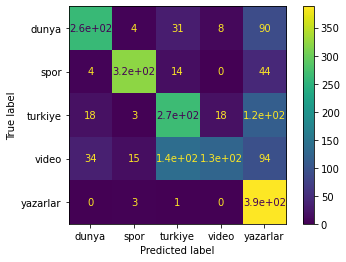

In [ ]:
plot_confusion_matrix(CV_MNB,x_test,y_test)

### Classification Report with F1-Score and Accuracy Score

In [ ]:
y_pred = CV_LR.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       dunya       0.84      0.80      0.82       395
        spor       0.96      0.89      0.92       384
     turkiye       0.79      0.62      0.69       421
       video       0.80      0.77      0.79       408
    yazarlar       0.72      0.99      0.83       392

    accuracy                           0.81      2000
   macro avg       0.82      0.81      0.81      2000
weighted avg       0.82      0.81      0.81      2000



### Confussion Matrix

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[317   3  15  22  38]
 [  5 341   4   5  29]
 [ 32   2 259  53  75]
 [ 23   9  50 316  10]
 [  2   1   1   0 388]]


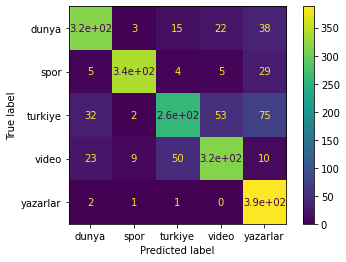

In [ ]:
plot_confusion_matrix(CV_LR,x_test,y_test)